In [1]:
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fromDataToTrain():
    path = '/Users/zhengkaizhang/Desktop/data_processing/data_collection/node06/'
    date = generateList()
    time = []
    population = []
    for d in date:
        f_path = path + d
        with open(f_path) as f:
            count = 0
            t = 0
            line_num = 0
            for line in f.readlines():
                s = line.split(' ')
                if (s[0] == '*'):
                    count += 1
                    if line_num < 90:
                        count += int(s[3])
                        line_num += 1
                    else:
                        t += 1
                        time.append(t)
                        population.append(count / 90.0)
                        count = int(s[3])
                        line_num = 0
    
    time = np.array(time)
    population = np.array(population)
    
    np.save('time_week.npy', time)
    np.save('population_week.npy', population)


def generateList():
    list1 = range(16, 31)
    list2 = range(1, 16)
    weekend1 = [21,22,28,29]
    weekend2 = [4,5,11,12]
    result = []
    for i in list1:
        if i in weekend1:
            continue
        tmp = 'data/n6_2018-07-' + str(i) + '_0.txt'
        result.append(tmp)
    
    for i in list2:
        if i in weekend2:
            continue
        if i < 10:
            tmp = 'data/n6_2018-08-0' + str(i) + '_0.txt'
        else:
            tmp = 'data/n6_2018-08-' + str(i) + '_0.txt'
        result.append(tmp)
    return result

Text(0,0.5,u'Population')

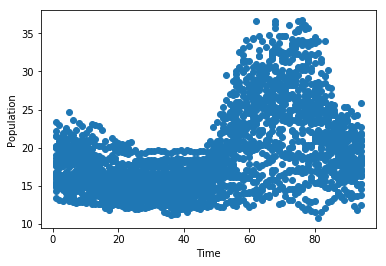

In [257]:
time = np.load('time.npy')
population = np.load('population.npy')
plt.scatter(time, population)
plt.figure(1)
plt.xlabel('Time')
plt.ylabel('Population')

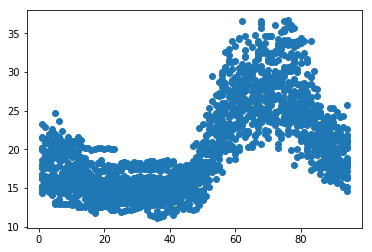

In [260]:
time_week = np.load('time_week.npy')
population_week = np.load('population_week.npy')
plt.scatter(time_week, population_week)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(time_week, population_week, test_size=0.15, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=101)
p = np.poly1d(np.polyfit(X_train, y_train, 13))
error = ((p(X_val) - y_val) ** 2).mean()
error

7.4906752272988797

8.1854678177590348

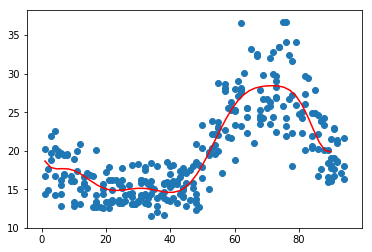

In [262]:
x = np.linspace(1,90)
y = p(x)
plt.plot(x,y, 'r-')
plt.scatter(X_test, y_test)
error = ((p(X_test) - y_test) ** 2).mean()
error

In [3]:
time = np.load('time.npy')
population = np.load('population.npy')

In [6]:
time.shape

(2727,)